In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [5]:
df = pd.read_csv('PolyData.csv')
df.head()

,x,y
0,-0.007332,3.630571
1,2.218216,7.747048
2,0.265452,3.266012
3,-1.677817,3.868567
4,-2.626743,4.860727


In [35]:
df.shape

(200, 2)

In [6]:
x= df['x'].values.reshape(-1,1)
y= df['y'].values.reshape(-1,1)

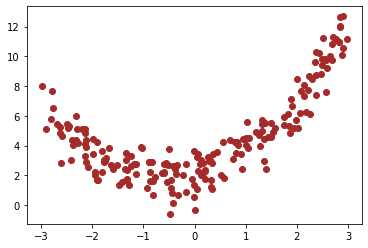

In [11]:
plt.scatter(df['x'],df['y'],color='brown')

In [13]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
r2_score(ytest,y_pred)

0.3989177389501344

Text(0, 0.5, 'Y')

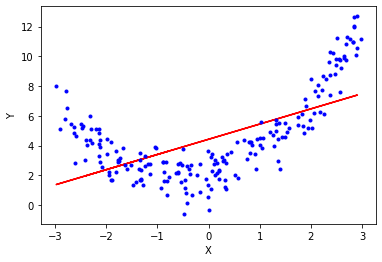

In [19]:
plt.plot(xtrain,lr.predict(xtrain),color='r')
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")


## Polynomial Reg

In [24]:
#apllying Poly Reg 
# degree --> x^0,
poly = PolynomialFeatures(degree=2,include_bias=False)
xtrain_trans = poly.fit_transform(xtrain)
xtest_trans = poly.transform(xtest)

In [27]:
print(xtrain[0])
print(xtrain_trans[0])


[-0.77580243]
[-0.77580243  0.60186942]


In [38]:
polyr = LinearRegression()
polyr.fit(xtrain_trans,ytrain)
ypred = polyr.predict(xtest_trans)
print(r2_score(ytest,ypred))
print(polyr.coef_)
print(polyr.intercept_)

0.8832381348935626
[[0.88651165 0.81365617]]
[2.0428165]


In [49]:
xnew  =np.linspace(-3,3,200).reshape(200,1)
xnew_poly = poly.transform(xnew)
ynew = polyr.predict(xnew_poly)

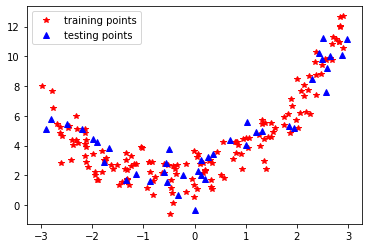

In [50]:
plt.plot(xtrain,ytrain,'r*',label="training points")
plt.plot(xtest,ytest,'b^',label="testing points")
plt.legend()


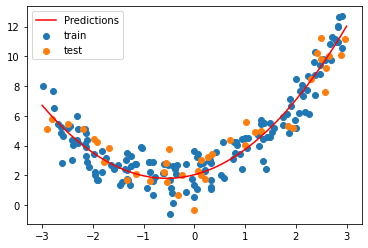

In [57]:
plt.plot(xnew,ynew,'r-',label="Predictions")
plt.scatter(xtrain,ytrain,label="train")
plt.scatter(xtest,ytest,label="test")
plt.plot()
plt.legend()


In [73]:
def polynomial_reg(degree):
    xnew  = np.linspace(-3,3,200).reshape(200,1)
    xnew_poly = poly.transform(xnew)
    
    polybig = PolynomialFeatures(degree= degree,include_bias=False)
    sc = StandardScaler()
    linreg = LinearRegression()
    polynomial_regression = Pipeline([
        ("Poly features",polybig),
        ("std_scalar",sc),
        ("lin_reg",linreg)
    ])
    
    polynomial_regression.fit(x,y)
    y_newbig = polynomial_regression.predict(xnew)
    plt.plot(xnew,y_newbig,'r',label = "DEGREE" +str(degree),linewidth = 2)
    
    plt.plot(xtrain,ytrain,'r*',linewidth = 3)
    plt.plot(xtest,ytest,'g^',linewidth = 3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,5])

    


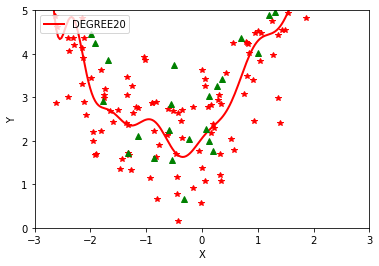

In [74]:
polynomial_reg(20)

In [68]:
#power of polynomial
poly.powers_

array([[1],
       [2]], dtype=int64)